<a href="https://colab.research.google.com/github/stefelmax/cars_definition/blob/main/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B0%D1%80%D0%BA%D0%B8_%D0%B0%D0%B2%D1%82%D0%BE%D0%BC%D0%BE%D0%B1%D0%B8%D0%BB%D1%8F_(%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import math
import os
from google.colab import drive
import pandas as pd

%matplotlib inline

In [ ]:
! unzip -q "/content/drive/MyDrive/Курсы/Программирование/neuro/middle_fmr.zip" -d '/content/cars'

In [ ]:
train_path = '/content/cars' #Папка с папками картинок, рассортированных по категориям
batch_size = 10 #Размер выборки
img_width = 288 #Ширина изображения
img_height = 162 #Высота изображения

In [ ]:
#Генератор изображений
datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=10, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.1, #Зумируем изображения при генерации выборки
    horizontal_flip=True, #Включаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    validation_split=0.2 #Указываем разделение изображений на обучающую и тестовую выборку
)

In [ ]:
# обучающая выборка
train_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='training' # устанавливаем как набор для обучения
)

# проверочная выборка
validation_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='validation' # устанавливаем как валидационный набор
)

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.


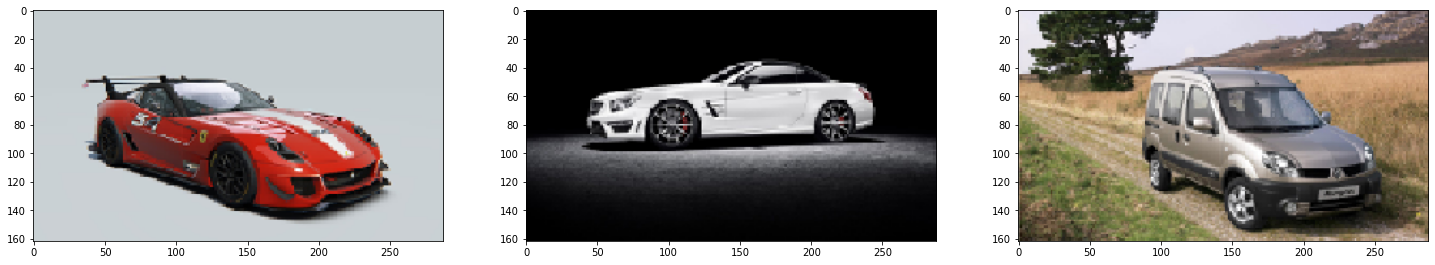

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 3, figsize=(25, 5)) #Создаем полотно из 3 графиков
for i in range(3): #Проходим по всем классам
  car_path = train_path + '/' + os.listdir(train_path)[i] + '/'#Формируем путь к выборке
  img_path = car_path + random.choice(os.listdir(car_path)) #Выбираем случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) #Отображение фотографии

plt.show() #Показываем изображения

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())

model.add(Dense(2048, activation='elu'))
model.add(Dense(4096, activation='elu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/70
274/274 [==============================] - 87s 269ms/step - loss: 1.1002 - accuracy: 0.3553 - val_loss: 1.0964 - val_accuracy: 0.3397
Epoch 2/70
274/274 [==============================] - 72s 261ms/step - loss: 1.0199 - accuracy: 0.4629 - val_loss: 0.9712 - val_accuracy: 0.5176
Epoch 3/70
274/274 [==============================] - 70s 254ms/step - loss: 0.9296 - accuracy: 0.5284 - val_loss: 0.9531 - val_accuracy: 0.5029
Epoch 4/70
274/274 [==============================] - 71s 258ms/step - loss: 0.9127 - accuracy: 0.5349 - val_loss: 0.9464 - val_accuracy: 0.5132
Epoch 5/70
274/274 [==============================] - 70s 255ms/step - loss: 0.8845 - accuracy: 0.5631 - val_loss: 0.9314 - val_accuracy: 0.5353
Epoch 6/70
274/274 [==============================] - 70s 256ms/step - loss: 0.8436 - accuracy: 0.6081 - val_loss: 0.9300 - val_accuracy: 0.5206
Epoch 7/70
274/274 [==============================] - 70s 257ms/step - loss: 0.8054 - accuracy: 0.6202 - val_loss: 0.9119 - val_ac

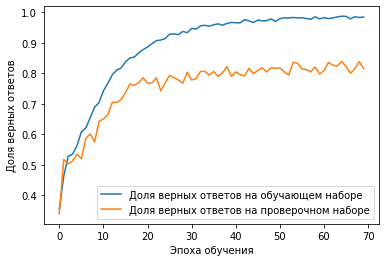

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=70,
    verbose=1)

#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/70


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


274/274 [==============================] - 72s 260ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.7590 - val_accuracy: 0.8309
Epoch 2/70
274/274 [==============================] - 71s 258ms/step - loss: 0.0086 - accuracy: 0.9978 - val_loss: 0.7921 - val_accuracy: 0.8397
Epoch 3/70
274/274 [==============================] - 70s 257ms/step - loss: 0.0053 - accuracy: 0.9989 - val_loss: 0.7456 - val_accuracy: 0.8412
Epoch 4/70
274/274 [==============================] - 70s 256ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.8282 - val_accuracy: 0.8382
Epoch 5/70
274/274 [==============================] - 72s 264ms/step - loss: 0.0050 - accuracy: 0.9978 - val_loss: 0.8924 - val_accuracy: 0.8368
Epoch 6/70
274/274 [==============================] - 71s 260ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.7570 - val_accuracy: 0.8441
Epoch 7/70
274/274 [==============================] - 72s 262ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.8747 - val_accuracy: 0.8

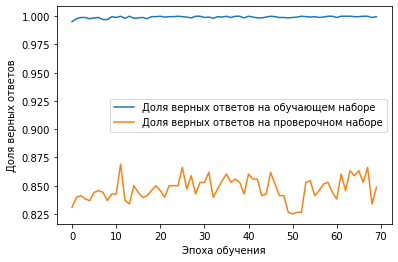

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=70,
    verbose=1)

#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/70


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


274/274 [==============================] - 73s 262ms/step - loss: 0.0017 - accuracy: 0.9989 - val_loss: 1.2241 - val_accuracy: 0.8426
Epoch 2/70
274/274 [==============================] - 71s 259ms/step - loss: 0.0027 - accuracy: 0.9989 - val_loss: 1.1821 - val_accuracy: 0.8588
Epoch 3/70
274/274 [==============================] - 71s 258ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 1.3420 - val_accuracy: 0.8485
Epoch 4/70
274/274 [==============================] - 70s 257ms/step - loss: 0.0013 - accuracy: 0.9993 - val_loss: 1.1474 - val_accuracy: 0.8426
Epoch 5/70
274/274 [==============================] - 71s 257ms/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 1.2645 - val_accuracy: 0.8338
Epoch 6/70
274/274 [==============================] - 70s 257ms/step - loss: 0.0025 - accuracy: 0.9985 - val_loss: 1.2165 - val_accuracy: 0.8485
Epoch 7/70
274/274 [==============================] - 71s 261ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 1.0856 - val_accuracy: 0.8

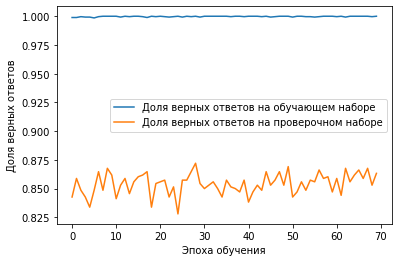

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.000001), metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=70,
    verbose=1)

#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()